
Multi-Hidden-Layer MLP Results:
  MSE: 0.0102
  R^2: -1560.1519


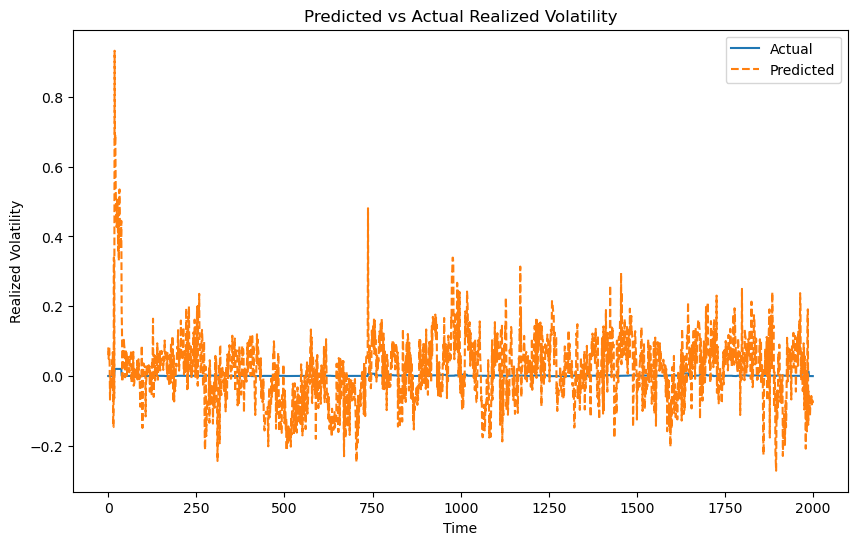

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess data
df = pd.read_csv("/Users/hanzichun/desktop/Optiver-07/Data/S27FE-10K.csv")

# Scaling features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(['realized_volatility'], axis=1)), columns=df.drop(['realized_volatility'], axis=1).columns)

X = df_scaled
y = df['realized_volatility']

# Train/test split ensuring no leakage
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False  # Avoid random splitting for time series
)

# Initialize and train the MLP model
multi_layer_mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                               activation='relu',
                               solver='adam',
                               max_iter=500,
                               random_state=42)

multi_layer_mlp.fit(X_train_scaled, y_train)
y_pred_multi = multi_layer_mlp.predict(X_test_scaled)

# Calculate MSE and R^2
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

# Print the results
print("\nMulti-Hidden-Layer MLP Results:")
print(f"  MSE: {mse_multi:.4f}")
print(f"  R^2: {r2_multi:.4f}")

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_multi, label='Predicted', linestyle='--')
plt.title("Predicted vs Actual Realized Volatility")
plt.xlabel("Time")
plt.ylabel("Realized Volatility")
plt.legend()
plt.show()